In diesem Projekt wird ein Image Classification Network erstellt, um Wüstenlandschaften von Waldlandschaften zu unterscheiden.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve,roc_auc_score

#NAME = "desert-vs-forest-cnn-64x2-{}".format(int(time.time()))
#tensorboard = TensorBoard(log_dir='logs\\{}'.format(NAME), histogram_freq=1)

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

Die Trainings- und Testdaten wurden in LoadAndStoreImageData.ipynb aufbereitet und in pickle-Dateien gespeichert. Diese werden wieder geladen. Input Data wird mit X bezeichnet, Target Data wird mit y bezeichnet.

In [2]:
training_X = pickle.load(open("NatureX_Training.pickle", "rb"));
training_y = pickle.load(open("Naturey_Training.pickle", "rb"));

training_X = training_X/255.0

test_X = pickle.load(open("NatureX_Test.pickle", "rb"));
test_y = pickle.load(open("Naturey_Test.pickle", "rb"));

test_X = test_X/255.0

Das CNN wird aufgebaut.

In [3]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = training_X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten()) # converts the 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

model.summary()

#%load_ext tensorboard
#%tensorboard --logdir=logs\\ --host localhost --port 6006

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 64)        0         
__________________________________________

Das CNN wird mit den Trainingsdaten trainiert. Trainings und Validation Loss über die einzelnen Iterationen hinweg werden ausgegeben.

Train on 5040 samples, validate on 1260 samples
Epoch 1/10
5040/5040 [==============================] - 78s 16ms/sample - loss: 0.2580 - acc: 0.8950 - val_loss: 0.3598 - val_acc: 0.8500
Epoch 2/10
5040/5040 [==============================] - 78s 15ms/sample - loss: 0.1882 - acc: 0.9274 - val_loss: 0.1719 - val_acc: 0.9373
Epoch 3/10
5040/5040 [==============================] - 75s 15ms/sample - loss: 0.1506 - acc: 0.9417 - val_loss: 0.1385 - val_acc: 0.9452
Epoch 4/10
5040/5040 [==============================] - 75s 15ms/sample - loss: 0.1154 - acc: 0.9599 - val_loss: 0.1385 - val_acc: 0.9476
Epoch 5/10
5040/5040 [==============================] - 81s 16ms/sample - loss: 0.1073 - acc: 0.9641 - val_loss: 0.1410 - val_acc: 0.9444
Epoch 6/10
5040/5040 [==============================] - 78s 15ms/sample - loss: 0.0771 - acc: 0.9756 - val_loss: 0.1344 - val_acc: 0.9484
Epoch 7/10
5040/5040 [==============================] - 80s 16ms/sample - loss: 0.0623 - acc: 0.9768 - val_loss: 0.1657 - va

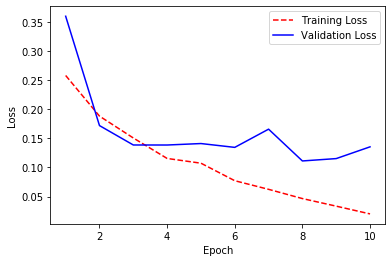

In [4]:
history = model.fit(training_X, training_y, batch_size=32, epochs=10, validation_split=0.2) #, callbacks=[tensorboard])

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, validation_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

Das CNN wird mit den Testdaten evaluiert und die Confusion Matrix wird erstellt und ausgegeben.

In [6]:
model.evaluate(test_X, test_y, batch_size=32)

pred_y = model.predict_classes(test_X, batch_size=32)

matrix = confusion_matrix(test_y, pred_y)
print("Confusion Matrix:")
print(matrix)

1482/1482 [==============================] - 6s 4ms/sample - loss: 0.1392 - acc: 0.9676
Confusion Matrix:
[[690  12]
 [ 36 744]]


ROC und AuC werden berechnet und ausgegeben.

ROC:


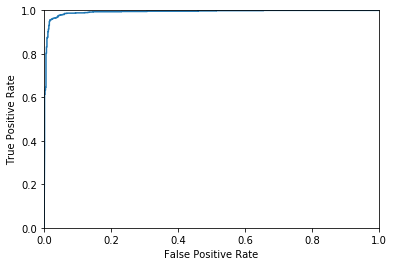

AuC: 0.9917862882606472


In [7]:
pred_y_proba = model.predict_proba(test_X, batch_size=32)
fpr , tpr , thresholds = roc_curve (test_y , pred_y_proba)

def plot_roc_curve(fpr,tpr):
    plt.plot(fpr, tpr)
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
print("ROC:")
plot_roc_curve (fpr,tpr)

auc = auc_score=roc_auc_score(test_y , pred_y_proba) 
print ("AuC:", auc)